# HK Model with Separable Landau Interaction

## $d = 1$

#### Imports

In [1]:
from HKLnumerics import HKLseparable_1D, PhaseDiagram_1D, PlotFunctions
import numpy as np

### Single Plot

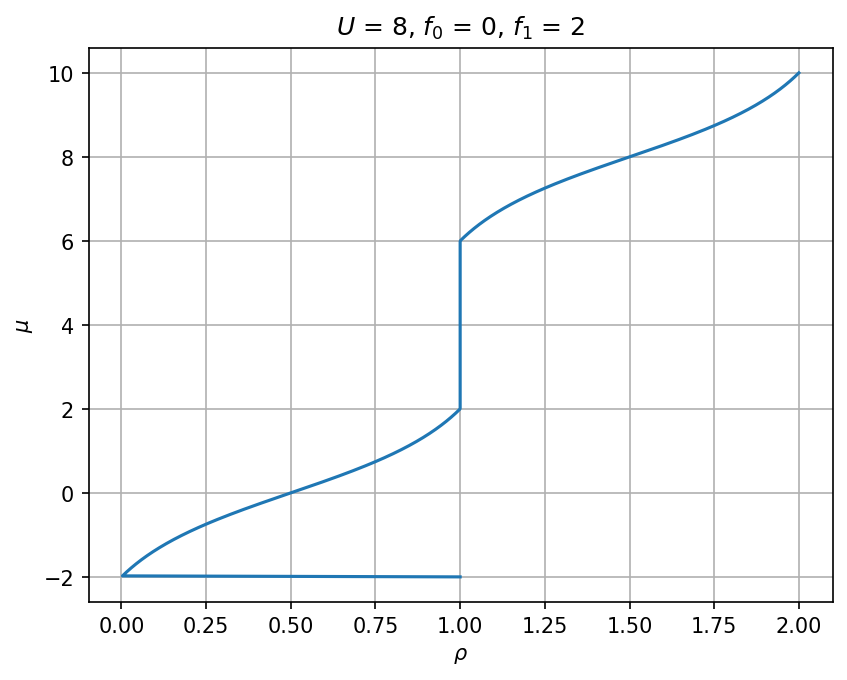

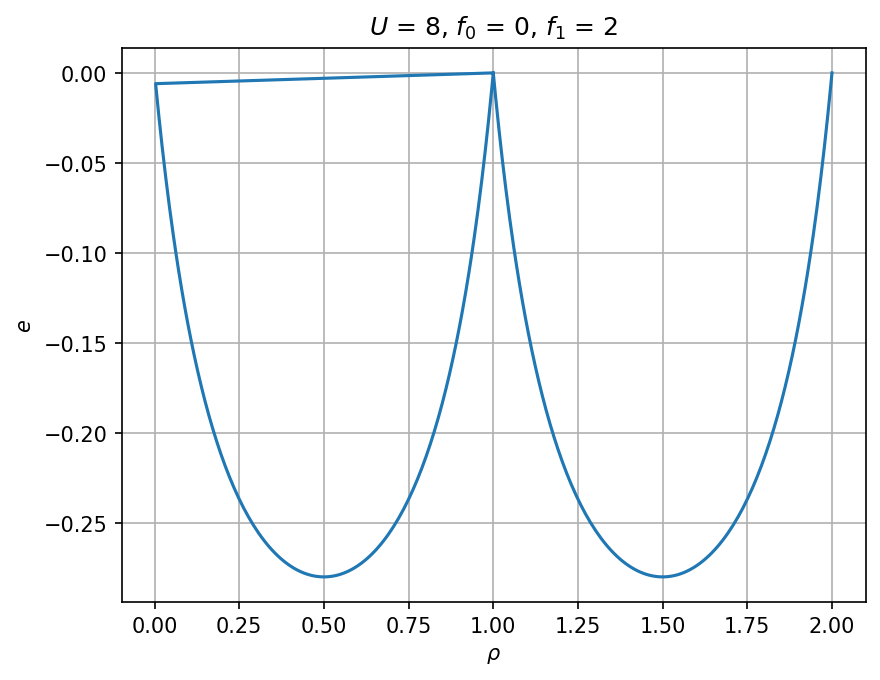

In [11]:
U = 8
f_0 = 0
f_1 = 2

f_0_str = r'$f_0$'
f_1_str = r'$f_1$'
U_str = r'$U$'

mu_array = HKLseparable_1D.create_mu_array(500, U, f_0)

rho_array_single_plot, e_array_single_plot = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, f_0, f_1)

PlotFunctions.one_plot(rho_array_single_plot, mu_array, r'$\rho$', r'$\mu$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')
PlotFunctions.one_plot(rho_array_single_plot, e_array_single_plot, r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

#### Energy Density

Progress: 99.8%                    

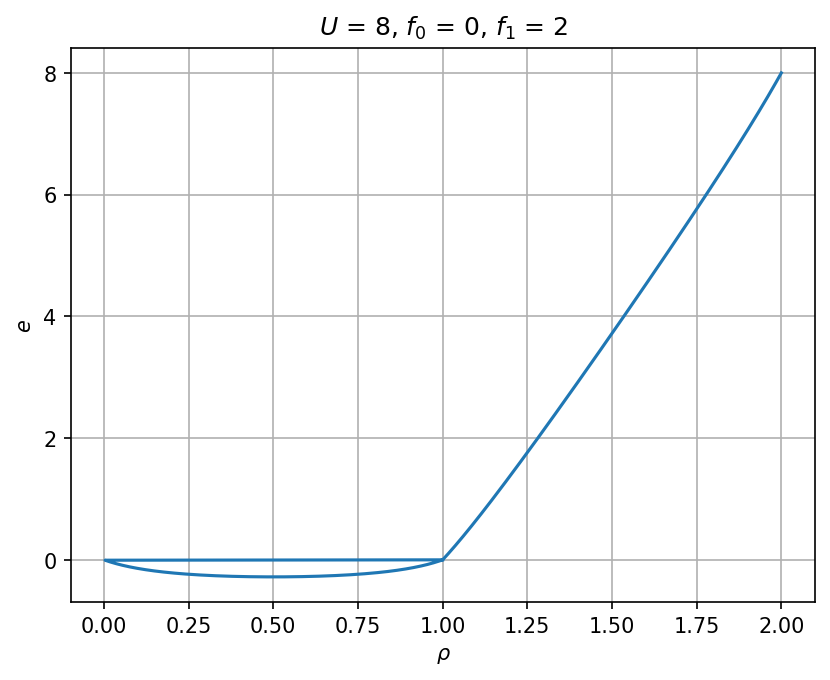

In [12]:
energy_array_single_plot = HKLseparable_1D.create_energy_array(mu_array, rho_array_single_plot, e_array_single_plot, U, f_0, f_1)
PlotFunctions.one_plot(rho_array_single_plot, energy_array_single_plot, r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

### $U = const.$, Investigate effect of $f_1$

In [2]:
U_1d_f1 = 6
f1s_1d = [0, 0.5, 1, 2]
N = 5000


str_f_1 = r'$f_1 / t$'
f1_1d_labels = []
rhos_1d_f1s = []
mus_1d_f1s_list = []
es_1d_f1s = []


mu_2d_f1s = HKLseparable_1D.create_mu_array(N, U_1d_f1, 0)

for f_1_val in f1s_1d:
    f1_1d_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_1d_f1, 0, f_1_val)

    rhos_1d_f1s.append(rho_arr_f1[1:])
    es_1d_f1s.append(e_arr_f1[1:])
    mus_1d_f1s_list.append(mu_2d_f1s[1:])

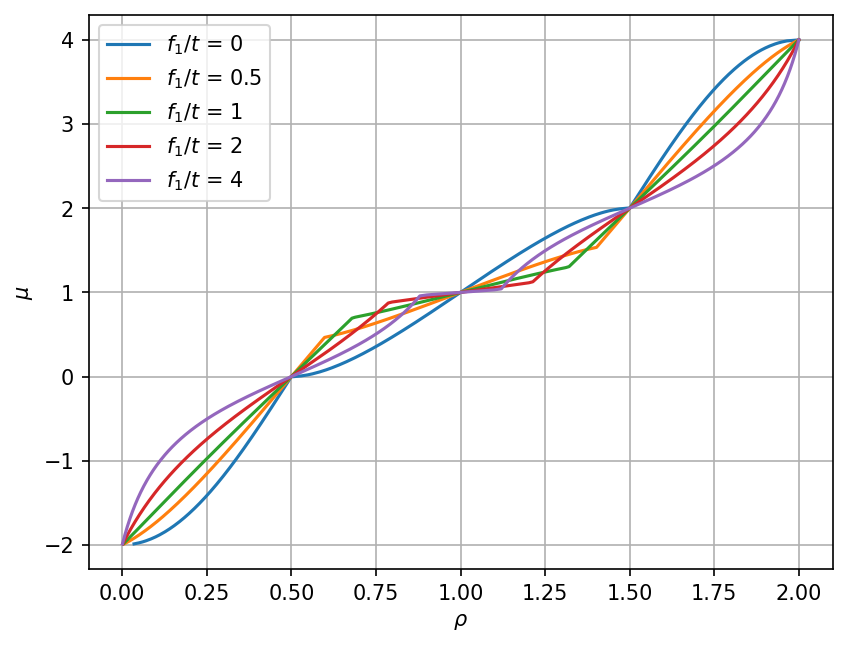

In [14]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, mus_1d_f1s_list, r'$\rho$', r'$\mu$')

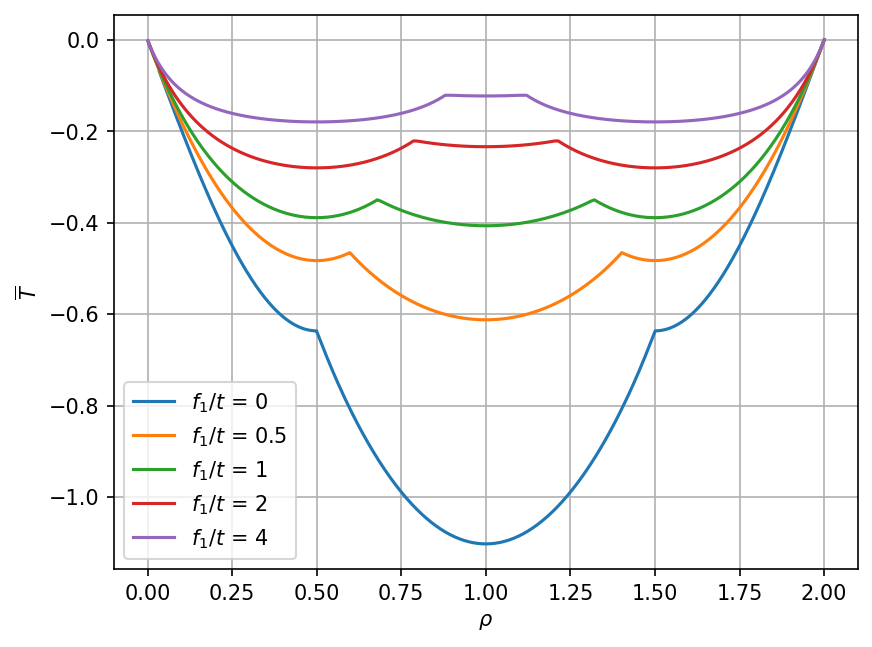

In [18]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, es_1d_f1s, r'$\rho$', r'$\overline{T}$')

In [65]:
U_1d_f1_weak = 1
N = 5000

rhos_1d_f1s_weak = []
mus_1d_f1s_list_weak = []
es_1d_f1s_weak = []


mu_2d_f1s_weak = HKLseparable_1D.create_mu_array(N, U_1d_f1_weak, 0)

for f_1_val in f1s_1d:
    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s_weak, U_1d_f1_weak, 0, f_1_val)

    rhos_1d_f1s_weak.append(rho_arr_f1[1:])
    es_1d_f1s_weak.append(e_arr_f1[1:])
    mus_1d_f1s_list_weak.append(mu_2d_f1s_weak[1:])

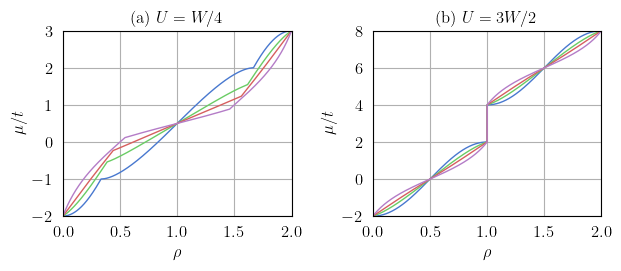

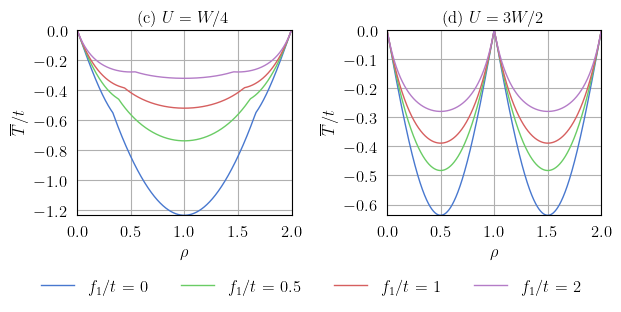

In [67]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(PlotFunctions)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [mus_1d_f1s_list_weak, mus_1d_f1s_list],
                                               r'$\rho$', r'$\mu / t$', [r'(a) $U=W/4$', r'(b) $U=3W/2$'], ylimits=[0.005, 0.005], yticks=[1, 2], legend=False,
                                               reverse=False, save_title='Plots/HKLseperable_mu_1d_many_f1.pdf')

PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [es_1d_f1s_weak, es_1d_f1s],
                                               r'$\rho$', r'$\overline{T}/t$', [r'(c) $U=W/4$', r'(d) $U=3W/2$'], ylimits=[0, 0], yticks=[0.2, 0.1], 
                                               reverse=False, save_title='Plots/HKLseperable_Tbar_1d_many_f1.pdf')

### $f_1 = const$, investigate how different $U$ are affected

In [15]:
f_1 = 0.5
N = 500

U_vals = [1, 2, 3, 4]

f_1_str = r'$f_1$'
rhos_U = []
es_U = []
mus_U = []
labels_U = []

for U_val in U_vals:
    mu_U_val = HKLseparable_1D.create_mu_array(N, U_val, 0)
    rho_U_val, e_U_val = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U_val, U_val, 0, f_1)

    labels_U.append(f'U = {U_val}')
    rhos_U.append(rho_U_val)
    es_U.append(e_U_val)
    mus_U.append(mu_U_val)

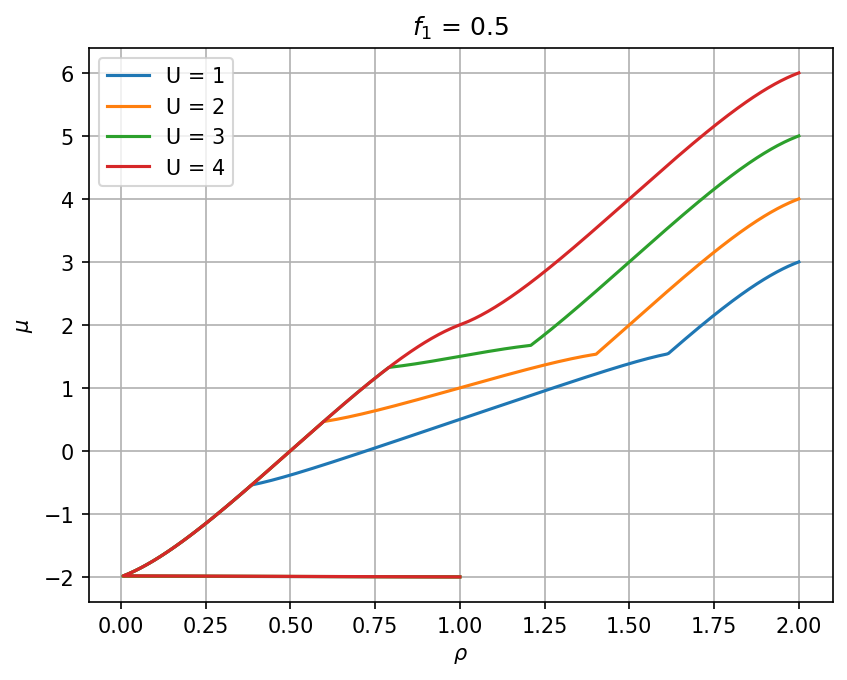

In [16]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$', title=f'{f_1_str} = {f_1}')

Second phase transition no longer at constant mu because band width is renormalized, energy of highest occupied state varies

### Phase Diagram

In [117]:
importlib.reload(PhaseDiagram_1D)

f1s_pd_1d = [0, 1, 2, 4]
N = 500

Ucs_1d =[]
pd_rhos_1d = []
pd_labels = []
str_f_1 = r'$f_1 / t$'

for f1_val in f1s_pd_1d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_1D.phase_diagram_landau(N, f1_val)

    pd_labels.append(f'{str_f_1} = {f1_val}')
    Ucs_1d.append(Uc_f1)
    pd_rhos_1d.append(rho_f1)
    print('\n')

pd_rhos_1d[0] -= 1

for U_arr in Ucs_1d:
    U_arr /= np.max(U_arr)


f1 = 0
Progress: 99.8%                    

f1 = 1
Progress: 99.8%                    

f1 = 2
Progress: 99.8%                    

f1 = 4
Progress: 99.8%                    



Canvas size (set)     : 4.252 in x 3.280 in = 10.80 cm x 8.33 cm
Tight bbox (rendered)  : 5.10718 in x 3.03129 in = 12.97 cm x 7.70 cm


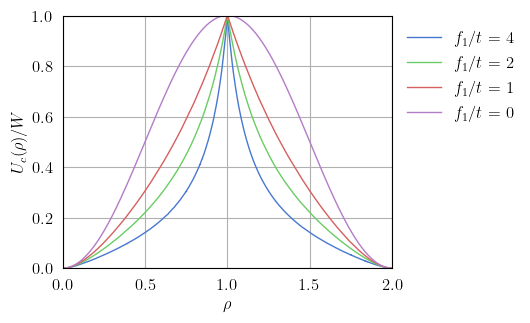

In [98]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_singleplot_multiple_lines(pd_labels, pd_rhos_1d[:-1], Ucs_1d[:-1], r'$\rho$', r'$U_c(\rho)/W$', yticks=0.2, save_title='Plots/U_C_HKL_1d.pdf')

Seems that in the limit $f_1 \rightarrow \infty$, $U_c$ converges to
\begin{equation}
    U_c = \begin{cases}
                4td \quad &\rho = 1 \\
                0 \quad &\text{else}
            \end{cases}
\end{equation}
Interesting because phase I disappears?

## $d = 2$

### Imports

In [6]:
from HKLnumerics import HKLseparable_2D, PlotFunctions, PhaseDiagram_2D
import numpy as np

### Chemical Potential

In [25]:
U_one = 8
f_1_one = 4

mu_2d_U_one = HKLseparable_2D.create_mu_array(100, U_one, 0)

rho_2d_U_one, e_2d_U_one = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_U_one, U_one, 0, f_1_one)

Progress: 100.0%                    

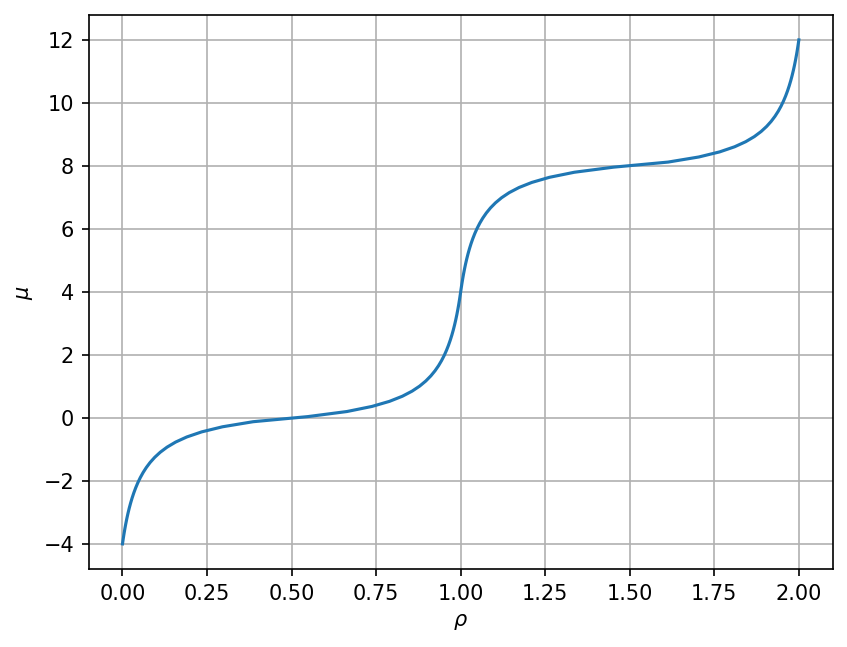

In [26]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, r'$\rho$', r'$\mu$')

### Fix $U$, investigate effect of $f_1$

In [102]:
U_2d_f1 = 4
f1s_2d = [0, 1, 4, 8]
N = 500


str_f_1 = r'$f_1 / t$'
f_1_labels = []
rhos_2d_f1s = []
mus_2d_f1s_list = []
es_2d_f1s = []


mu_2d_f1s = HKLseparable_2D.create_mu_array(N, U_2d_f1, 0)

for f_1_val in f1s_2d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_2d_f1, 0, f_1_val)

    rhos_2d_f1s.append(rho_arr_f1)
    es_2d_f1s.append(e_arr_f1)
    mus_2d_f1s_list.append(mu_2d_f1s)




f_1 = 0
Progress: 100.0%                    
f_1 = 1
Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    
f_1 = 8
Progress: 100.0%                    

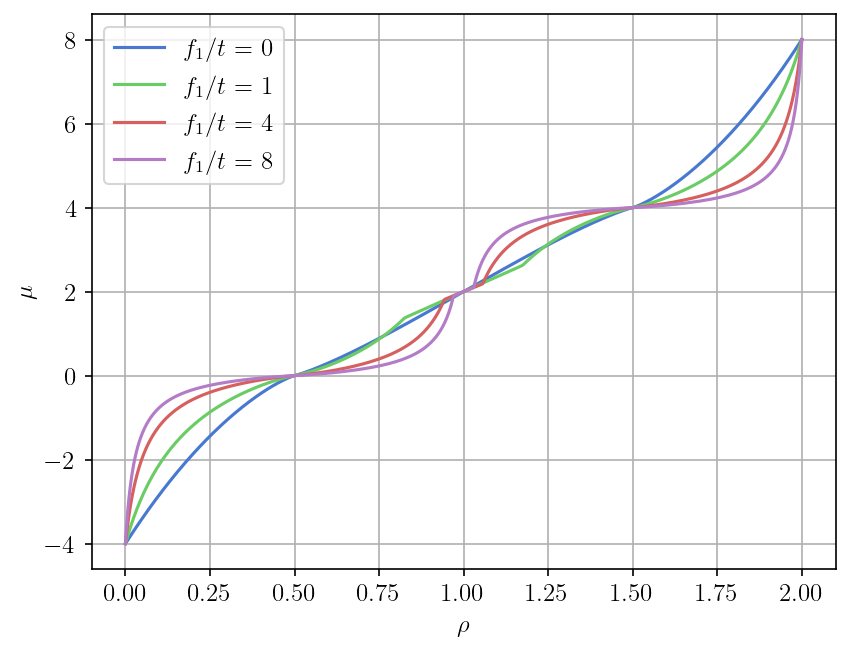

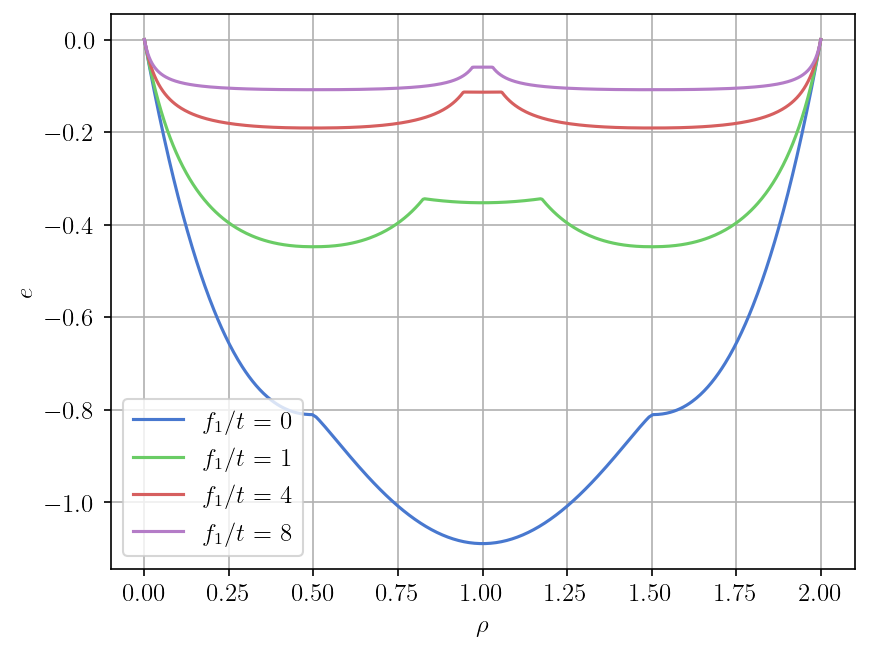

In [88]:
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, mus_2d_f1s_list, r'$\rho$', r'$\mu$')
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, es_2d_f1s, r'$\rho$', r'$e$')

In [98]:


U_2d_f1_strong = 12
f1s_2d = [0, 1, 4, 8]
N = 500

rhos_2d_f1s_strong = []
mus_2d_f1s_list_strong = []
es_2d_f1s_strong = []

mu_2d_f1s = HKLseparable_2D.create_mu_array(N, U_2d_f1_strong, 0)

for f_1_val in f1s_2d:
    print(f'\nf_1 = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_2d_f1_strong, 0, f_1_val)

    rhos_2d_f1s_strong.append(rho_arr_f1)
    es_2d_f1s_strong.append(e_arr_f1)
    mus_2d_f1s_list_strong.append(mu_2d_f1s)


f_1 = 0
Progress: 100.0%                    
f_1 = 1
Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    
f_1 = 8
Progress: 100.0%                    

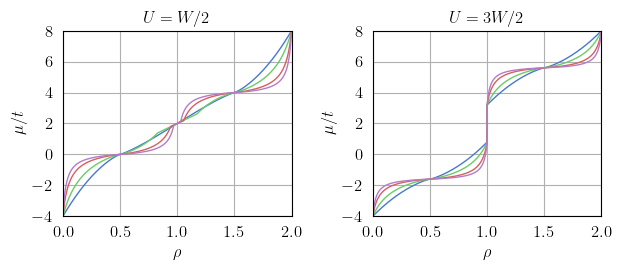

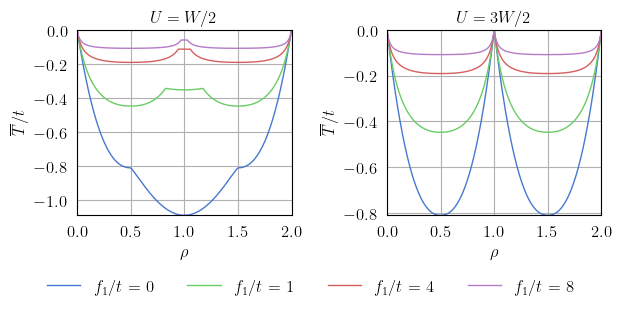

In [109]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_multiple_lines([f_1_labels, f1_1d_labels], [rhos_2d_f1s, rhos_2d_f1s_strong], [mus_2d_f1s_list, mus_2d_f1s_list], r'$\rho$', [r'$\mu/t$', r'$\mu/t$'],
                                               [r'$U=W/2$', r'$U=3W/2$'], legend=False, reverse=False, save_title='Plots/HKLseperable_2d_mu.pdf')
PlotFunctions.thesis_doubleplot_multiple_lines([f_1_labels, f_1_labels], [rhos_2d_f1s, rhos_2d_f1s_strong], [es_2d_f1s, es_2d_f1s_strong], r'$\rho$', [r'$\overline{T}/t$', r'$\overline{T}/t$'],
                                               [r'$U=W/2$', r'$U=3W/2$'], legend=True, reverse=False, yticks=[0.2, 0.2], save_title='Plots/HKLseperable_2d_T.pdf')

### Phase Diagram

In [112]:
from HKLnumerics import PhaseDiagram_2D
importlib.reload(PhaseDiagram_2D)

f1s_pd_2d = [0, 1, 2, 4]
N = 200

Ucs_2d =[]
pd_rhos_2d = []
pd_labels_2d = []
str_f_1 = r'$f_1 / t$'

for f1_val in f1s_pd_2d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_2D.phase_diagram_landau(N, f1_val)

    pd_labels_2d.append(f'{str_f_1} = {f1_val}')
    Ucs_2d.append(Uc_f1)
    pd_rhos_2d.append(rho_f1)
    print('\n')

f1 = 0
Progress: 98.5%                    

f1 = 1
Progress: 34.0%                    

/home/heinrich/Bachelorthesis/Numerics/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_2D.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_val = integrate.quad(J_1_shifted, -np.pi, np.pi)


Progress: 98.5%                    

f1 = 2
Progress: 98.5%                    

f1 = 4
Progress: 98.5%                    



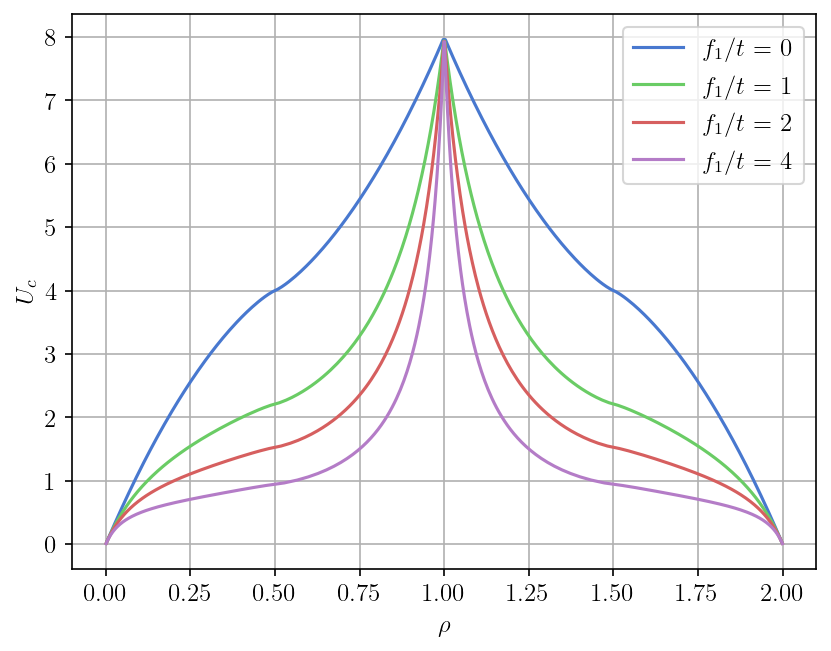

In [113]:
PlotFunctions.many_plots(pd_labels_2d, pd_rhos_2d, Ucs_2d, r'$\rho$', r'$U_c$')

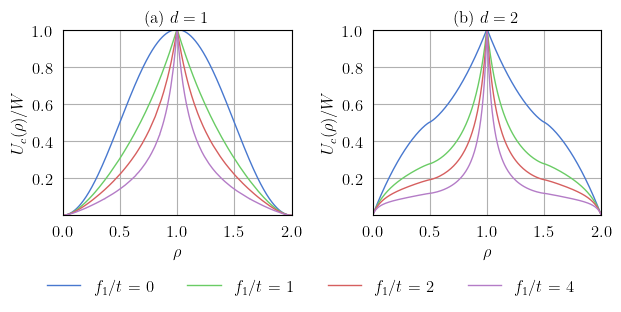

In [122]:
for U_arr in Ucs_2d:
    U_arr /= np.max(U_arr)

PlotFunctions.thesis_doubleplot_multiple_lines([pd_labels_2d, pd_labels_2d], [pd_rhos_1d, pd_rhos_2d], [Ucs_1d, Ucs_2d], r'$\rho$', [r'$U_c(\rho) / W$', r'$U_c(\rho) / W$'],
                                               [r'(a) $d=1$', r'(b) $d=2$'], yticks=[0.2, 0.2], reverse=False, save_title='Plots/HKLseparable_pd_1d2d.pdf')

## $d=3$

### Imports

In [13]:
from HKLnumerics import HKLseparable_3D, PlotFunctions
import numpy as np

In [4]:
print(np.__version__)

2.2.5


In [107]:
import importlib
importlib.reload(HKLseparable_3D)

U_3d_one = 18
f_1_3d_one = 1

mu_3d_U_one = HKLseparable_3D.create_mu_array(100, U_3d_one, 0)

rho_3d_U_one, e_3d_U_one = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_U_one, U_3d_one, 0, f_1_3d_one, use_fixed_point=True)

Progress: 100.0%                    

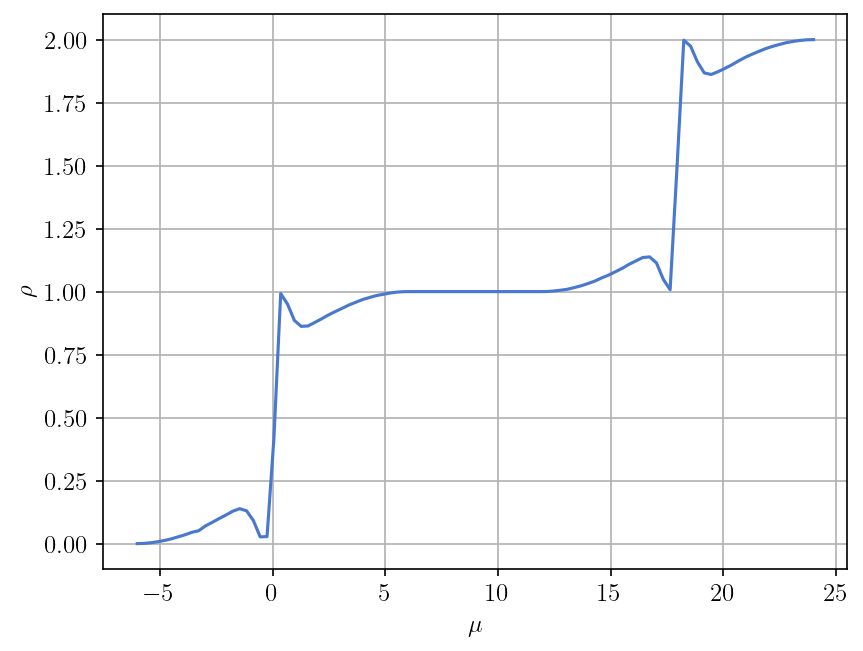

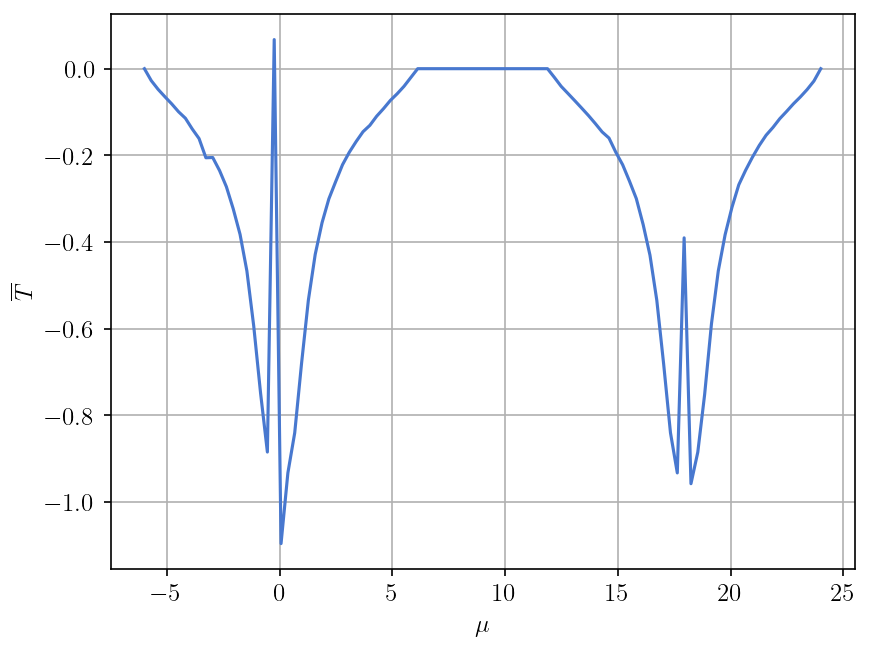

In [108]:
PlotFunctions.one_plot(mu_3d_U_one, rho_3d_U_one, r'$\mu$', r'$\rho$')
PlotFunctions.one_plot(mu_3d_U_one, e_3d_U_one, r'$\mu$', r'$\overline{T}$')

In [6]:
U_3d_f1 = 16
f1s_3d = [0, 4]
N = 100


str_f_1 = r'$f_1$'
f_1_labels = []
rhos_3d_f1s = []
mus_3d_f1s_list = []
es_3d_f1s = []


mu_3d_f1s = HKLseparable_3D.create_mu_array(N, U_3d_f1, 0)

for f_1_val in f1s_3d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_f1s, U_3d_f1, 0, f_1_val)

    rhos_3d_f1s.append(rho_arr_f1)
    es_3d_f1s.append(e_arr_f1)
    mus_3d_f1s_list.append(mu_3d_f1s)


f_1 = 0
Progress: 99.0%                    

/Users/marieheinrich/Desktop/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_3D.py:37: RuntimeWarning: divide by zero encountered in divide
  - 1 / (np.pi * np.sqrt(np.square(2 * t * y) - np.square(x))),


Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    

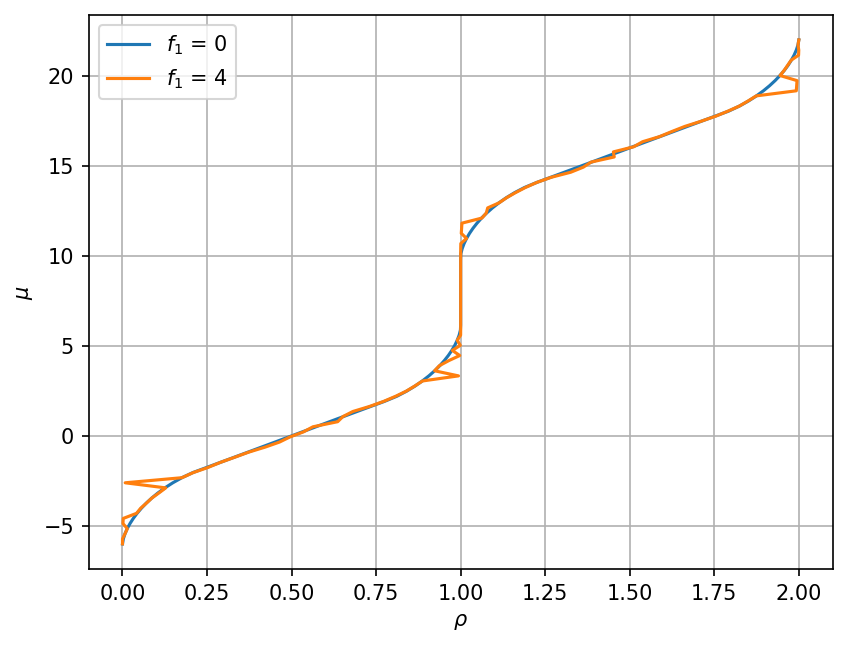

In [7]:
PlotFunctions.many_plots(f_1_labels, rhos_3d_f1s, mus_3d_f1s_list, r'$\rho$', r'$\mu$')